In [1]:
import os
import pandas as pd
import geopandas as gpd
from scipy.stats import truncnorm, norm

In [2]:
os.chdir("..")

In [3]:
mill_txns = pd.read_parquet(r".\data\generated\1M_txns_run\parq_files\all_txns.parquet", engine="pyarrow")
mill_txns.head(2)

,client_id,txn_time,unix_time,amount,type,channel,category,online,merchant_id,trans_city,trans_lat,trans_lon,trans_ip,device_id,account,is_fraud,is_suspicious,status,rule
0,3135,2025-01-01 00:01:00,1735689660,410.00,purchase,ecom,misc_net,True,6944.0,Кемерово,55.390972,86.046786,2.60.11.155,5322.0,NaN,False,False,approved,not applicable
1,11034,2025-01-01 00:02:00,1735689720,2404.68,purchase,ecom,misc_net,True,6885.0,Москва,55.753879,37.620373,2.60.20.15,9247.0,NaN,False,False,approved,not applicable


In [7]:
mill_txns = mill_txns.reset_index().rename(columns={"index":"txn_id"})
mill_txns["txn_id"] += 1
mill_txns.head()

,txn_id,client_id,txn_time,unix_time,amount,type,channel,category,online,merchant_id,trans_city,trans_lat,trans_lon,trans_ip,device_id,account,is_fraud,is_suspicious,status,rule
0,1,3135,2025-01-01 00:01:00,1735689660,410.00,purchase,ecom,misc_net,True,6944.0,Кемерово,55.390972,86.046786,2.60.11.155,5322.0,NaN,False,False,approved,not applicable
1,2,11034,2025-01-01 00:02:00,1735689720,2404.68,purchase,ecom,misc_net,True,6885.0,Москва,55.753879,37.620373,2.60.20.15,9247.0,NaN,False,False,approved,not applicable
2,4,9833,2025-01-01 00:05:00,1735689900,1100.00,purchase,ecom,grocery_net,True,6886.0,Махачкала,42.984857,47.504630,2.60.19.182,9092.0,NaN,False,False,approved,not applicable
3,5,4025,2025-01-01 00:05:00,1735689900,1200.00,purchase,ecom,grocery_net,True,6805.0,Ижевск,56.852744,53.211396,2.60.14.228,6846.0,NaN,False,False,approved,not applicable
4,3,700,2025-01-01 00:05:00,1735689900,2143.25,purchase,ecom,shopping_net,True,6850.0,Петрозаводск,61.789090,34.359626,2.60.2.157,1174.0,NaN,False,False,approved,not applicable


In [4]:
mill_txns.shape

(475387, 19)

In [8]:
mill_txns.to_csv(r".\data\generated\1M_txns_run\txns_475K.csv", index=False)

In [3]:
all_txns = pd.read_parquet(r".\data\for_pbi\not_csv\all_txns.parquet").reset_index().rename(columns={"index":"txn_id"})
all_txns["txn_id"] += 1
all_txns.head(2)

,txn_id,client_id,txn_time,unix_time,amount,type,channel,category,online,merchant_id,trans_city,trans_lat,trans_lon,trans_ip,device_id,account,is_fraud,is_suspicious,status,rule
0,1,1514,2025-01-01 00:13:00,1735690380,1.00,purchase,ecom,shopping_net,True,6866.0,Самара,53.195166,50.106769,2.60.5.155,2552.0,NaN,False,False,approved,not applicable
1,2,399,2025-01-01 02:10:00,1735697400,929.02,purchase,ecom,grocery_net,True,6963.0,Курган,55.444345,65.316134,2.60.1.123,670.0,NaN,False,False,approved,not applicable


In [6]:
all_txns_csv = pd.read_csv(r".\data\for_pbi\all_txns.csv")
all_txns_csv.query("txn_id == 16975").loc[:, "amount"]

17176    581.18
Name: amount, dtype: float64

In [47]:
all_txns.to_csv(r".\data\for_pbi\all_txns.csv", index=False)

In [13]:
cities = gpd.read_file(r".\data\for_pbi\not_csv\cities.gpkg").drop(columns="geometry")
cities.head(2)

,region,city,timezone,lat,lon,population,city_id
0,Москва,Москва,UTC+3,55.753879,37.620373,11514330,1
1,Санкт-Петербург,Санкт-Петербург,UTC+3,59.939125,30.315822,4848742,74


In [14]:
cities.columns

Index(['region', 'city', 'timezone', 'lat', 'lon', 'population', 'city_id'], dtype='object')

In [15]:
cities = cities[['city_id','region', 'city', 'timezone', 'lat', 'lon', 'population']]
cities.head(1)

,city_id,region,city,timezone,lat,lon,population
0,1,Москва,Москва,UTC+3,55.753879,37.620373,11514330


In [30]:
offline_merchants_points = pd.read_parquet(r".\data\for_pbi\not_csv\offline_merchants_points.parquet") \
                             .astype({"merchant_id":"int"})
offline_merchants_points.head(1)

,city,city_id,category,merchant_id,merchant_lat,merchant_lon
0,Москва,1,gas_transport,1,55.711178,37.863932


In [31]:
offline_merchants_points.columns

Index(['city', 'city_id', 'category', 'merchant_id', 'merchant_lat',
       'merchant_lon'],
      dtype='object')

In [32]:
offline_merchants_points = offline_merchants_points[['merchant_id', 'city', 'city_id', 'category', 'merchant_lat',
       'merchant_lon']]
offline_merchants_points.head(2)

,merchant_id,city,city_id,category,merchant_lat,merchant_lon
0,1,Москва,1,gas_transport,55.711178,37.863932
1,2,Москва,1,grocery_pos,55.896746,37.370257


In [33]:
offline_merchants_points.to_csv(r".\data\for_pbi\offline_merchants_points.csv", index=False, date_format="%Y-%m-%d")

In [34]:
pd.read_csv(r".\data\for_pbi\offline_merchants_points.csv")

,merchant_id,city,city_id,category,merchant_lat,merchant_lon
0,1,Москва,1,gas_transport,55.711178,37.863932
1,2,Москва,1,grocery_pos,55.896746,37.370257
2,3,Москва,1,home,55.797594,37.382283
3,4,Москва,1,shopping_pos,55.723753,37.654267
4,5,Москва,1,kids_pets,55.907808,37.542508
...,...,...,...,...,...,...
6771,6772,Братск,20,personal_care,56.261769,101.949020
6772,6773,Братск,20,food_dining,56.054816,101.711361
6773,6774,Братск,20,health_fitness,56.159989,101.626347
6774,6775,Братск,20,misc_pos,56.246075,101.833742


In [37]:
from data_generator.utils import calc_distance

In [38]:
clients = pd.read_parquet(r".\data\for_pbi\not_csv\clients.parquet")
clients.head(2)

,client_id,birth_date,sex,region,city,lat,lon,city_id,home_ip
0,1,1995-12-07,female,Рязанская,Рязань,54.625457,39.735999,18,2.60.0.1
1,2,1970-01-29,male,Москва,Москва,55.753879,37.620373,1,2.60.0.2


In [98]:
txns_merged = all_txns.merge(clients[["client_id", "city", "lat", "lon"]], on="client_id")
txns_merged.head(2)

,txn_id,client_id,txn_time,unix_time,amount,type,channel,category,online,merchant_id,...,trans_ip,device_id,account,is_fraud,is_suspicious,status,rule,city,lat,lon
0,1,1514,2025-01-01 00:13:00,1735690380,1.00,purchase,ecom,shopping_net,True,6866.0,...,2.60.5.155,2552.0,NaN,False,False,approved,not applicable,Самара,53.195166,50.106769
1,2,399,2025-01-01 02:10:00,1735697400,929.02,purchase,ecom,grocery_net,True,6963.0,...,2.60.1.123,670.0,NaN,False,False,approved,not applicable,Курган,55.444345,65.316134


In [99]:
txns_merged["distance_km"] = geod.inv(txns_merged.trans_lon, txns_merged.trans_lat, \
                                            txns_merged.lon, txns_merged.lat)[-1]
txns_merged["distance_km"] = txns_merged["distance_km"].round() / 1000
txns_merged["distance_km"] = txns_merged["distance_km"].fillna(0)
txns_merged.drop(columns=["city", "lat", "lon"], inplace=True)
txns_merged.tail()

,txn_id,client_id,txn_time,unix_time,amount,type,channel,category,online,merchant_id,...,trans_lat,trans_lon,trans_ip,device_id,account,is_fraud,is_suspicious,status,rule,distance_km
19696,19487,1526,2025-01-21 10:31:48,1737455508,4918.3,purchase,ecom,misc_net,True,6950.0,...,43.116381,131.882348,5.8.21.193,15020.0,NaN,True,False,declined,trans_freq_increase,6433.668
19697,19506,11710,2025-01-21 16:35:13,1737477313,5490.0,purchase,ecom,misc_net,True,6851.0,...,53.348115,83.779836,5.8.29.15,13705.0,NaN,False,False,approved,not applicable,2943.040
19698,19507,11710,2025-01-21 16:38:13,1737477493,4740.0,purchase,ecom,misc_net,True,6851.0,...,53.348115,83.779836,5.8.29.15,13705.0,NaN,False,False,approved,not applicable,2943.040
19699,19508,11710,2025-01-21 16:40:13,1737477613,3320.0,purchase,ecom,misc_net,True,6851.0,...,53.348115,83.779836,5.8.29.15,13705.0,NaN,False,False,approved,not applicable,2943.040
19700,19509,11710,2025-01-21 16:45:13,1737477913,3900.0,purchase,ecom,grocery_net,True,6851.0,...,53.348115,83.779836,5.8.29.15,13705.0,NaN,True,False,declined,trans_freq_increase,2943.040


In [100]:
txns_merged.to_csv(r".\data\for_pbi\all_txns.csv", index=False)

In [95]:
pd.read_csv(r".\data\for_pbi\all_txns.csv")

,txn_id,client_id,txn_time,unix_time,amount,type,channel,category,online,merchant_id,...,trans_lat,trans_lon,trans_ip,device_id,account,is_fraud,is_suspicious,status,rule,distance_km
0,1,1514,2025-01-01 00:13:00,1735690380,1.00,purchase,ecom,shopping_net,True,6866.0,...,53.195166,50.106769,2.60.5.155,2552.0,NaN,False,False,approved,not applicable,0.000
1,2,399,2025-01-01 02:10:00,1735697400,929.02,purchase,ecom,grocery_net,True,6963.0,...,55.444345,65.316134,2.60.1.123,670.0,NaN,False,False,approved,not applicable,0.000
2,3,491,2025-01-01 02:35:00,1735698900,2063.67,purchase,ecom,shopping_net,True,6957.0,...,56.143938,47.248872,2.60.1.212,825.0,NaN,False,False,approved,not applicable,0.000
3,4,576,2025-01-01 02:53:00,1735699980,1.00,purchase,ecom,misc_net,True,6861.0,...,60.939738,76.569621,2.60.2.39,969.0,NaN,False,False,approved,not applicable,0.000
4,5,482,2025-01-01 03:01:00,1735700460,770.00,purchase,ecom,grocery_net,True,6902.0,...,52.286351,104.280655,2.60.1.203,808.0,NaN,False,False,approved,not applicable,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19696,19487,1526,2025-01-21 10:31:48,1737455508,4918.30,purchase,ecom,misc_net,True,6950.0,...,43.116381,131.882348,5.8.21.193,15020.0,NaN,True,False,declined,trans_freq_increase,6433.668
19697,19506,11710,2025-01-21 16:35:13,1737477313,5490.00,purchase,ecom,misc_net,True,6851.0,...,53.348115,83.779836,5.8.29.15,13705.0,NaN,False,False,approved,not applicable,2943.040
19698,19507,11710,2025-01-21 16:38:13,1737477493,4740.00,purchase,ecom,misc_net,True,6851.0,...,53.348115,83.779836,5.8.29.15,13705.0,NaN,False,False,approved,not applicable,2943.040
19699,19508,11710,2025-01-21 16:40:13,1737477613,3320.00,purchase,ecom,misc_net,True,6851.0,...,53.348115,83.779836,5.8.29.15,13705.0,NaN,False,False,approved,not applicable,2943.040


In [72]:
last_legit_txns = txns_merged.query("trans_city == city and status == 'approved'").groupby("client_id", as_index=False).tail(1)
last_legit_txns.head(3)

,txn_id,client_id,txn_time,unix_time,amount,type,channel,category,online,merchant_id,...,trans_ip,device_id,account,is_fraud,is_suspicious,status,rule,city,lat,lon
1901,19659,3269,2025-01-03 11:11:00,1735902660,8000.0,purchase,ecom,misc_net,True,6918.0,...,2.60.12.24,5555.0,NaN,False,False,approved,not applicable,Саранск,54.180760,45.186226
2713,19550,3602,2025-01-04 02:22:00,1735957320,25000.0,outbound,transfer,not applicable,True,NaN,...,2.60.13.86,6135.0,16832.0,False,False,approved,not applicable,Красноярск,56.009466,92.852416
2714,19581,3594,2025-01-04 02:42:00,1735958520,2300.0,outbound,transfer,not applicable,True,NaN,...,2.60.13.78,6119.0,15986.0,False,False,approved,not applicable,Сочи,43.585583,39.723142


In [71]:
first_fraud = all_txns.query("is_fraud == True").groupby("client_id", as_index=False).head(1)\
                        [["client_id", "txn_id", "txn_time", "trans_lat", "trans_lon"]].reset_index(drop=True)
first_fraud["trans_lat"] = first_fraud["trans_lat"].fillna(first_fraud.merge(clients, on="client_id")["lat"])
first_fraud["trans_lon"] = first_fraud["trans_lon"].fillna(first_fraud.merge(clients, on="client_id")["lon"])
first_fraud.head()

,client_id,txn_id,txn_time,trans_lat,trans_lon
0,3269,19660,2025-01-03 13:43:00,54.180760,45.186226
1,3602,19551,2025-01-04 04:23:00,56.009466,92.852416
2,3594,19582,2025-01-04 20:30:00,43.585583,39.723142
3,3800,19618,2025-01-05 04:54:00,51.530376,45.953026
4,2949,19567,2025-01-07 23:11:00,53.630250,55.931571


In [74]:
?calc_distance

Signature: calc_distance(lat_01, lon_01, lat_02, lon_02, km=True)
Docstring:
Считает растояние между двумя координатами на Земном шаре.
Между координатами последней по времени транзакции и переданными координатами.
-----------------------------
lat_01 - float. Широта первой точки
lon_01 - float. Долгота первой точки
lat_02 - float. Широта второй точки
lon_02 - float. Долгота второй точки
km - bool. Единицы измерения. Либо километры либо метры. Километры округляет до 2-х знаков, метры до целого.
File:      c:\users\iaros\my_documents\education\projects\fraud_detection_01\data_generator\utils.py
Type:      function

In [78]:
from pyproj import Geod

In [80]:
# Геодезический расчёт по эллипсоиду WGS84
geod = Geod(ellps="WGS84")
# [-1] берет последний элемент из кортежа. Это метры
# distance_m = geod.inv(lon_01, lat_01, lon_02, lat_02)[-1]

In [83]:
one_leg_and_fraud = last_legit_txns.merge(first_fraud, on="client_id", suffixes=("_L", "_f"))
one_leg_and_fraud["distance_km"] = geod.inv(one_leg_and_fraud.trans_lon_L, one_leg_and_fraud.trans_lat_L, \
                                            one_leg_and_fraud.trans_lon_f, one_leg_and_fraud.trans_lat_f)[-1]
one_leg_and_fraud["distance_km"] = one_leg_and_fraud["distance_km"].round() / 1000
one_leg_and_fraud.tail()

,txn_id_L,client_id,txn_time_L,unix_time,amount,type,channel,category,online,merchant_id,...,status,rule,city,lat,lon,txn_id_f,txn_time_f,trans_lat_f,trans_lon_f,distance_km
105,19298,2280,2025-01-20 14:33:28,1737383608,397.11,purchase,POS,personal_care,False,3934.0,...,approved,not applicable,Белгород,50.597735,36.585824,19524,2025-01-20 16:35:55,53.175388,45.034741,646.684
106,19302,4271,2025-01-20 14:47:00,1737384420,1378.88,purchase,POS,grocery_pos,False,1663.0,...,approved,not applicable,Нижневартовск,60.939738,76.569621,19460,2025-01-20 22:50:08,47.209491,38.935154,2834.384
107,19333,3211,2025-01-20 16:09:58,1737389398,262.92,purchase,POS,health_fitness,False,1384.0,...,approved,not applicable,Нижний Тагил,57.910104,59.981324,19470,2025-01-20 19:11:55,58.010321,56.234178,226.595
108,19335,13276,2025-01-20 16:30:29,1737390629,1580.89,purchase,POS,health_fitness,False,2814.0,...,approved,not applicable,Тюмень,57.153082,65.534312,19512,2025-01-20 16:37:43,57.153082,65.534312,10.839
109,19645,13285,2025-01-21 01:44:00,1737423840,23000.00,purchase,ecom,shopping_net,True,6922.0,...,approved,not applicable,Грозный,43.317924,45.698110,19646,2025-01-21 03:38:00,43.317924,45.698110,0.000


In [ ]:
one_leg_and_fraud = one_leg_and_fraud['txn_id_f']

In [84]:
one_leg_and_fraud.columns

Index(['txn_id_L', 'client_id', 'txn_time_L', 'unix_time', 'amount', 'type',
       'channel', 'category', 'online', 'merchant_id', 'trans_city',
       'trans_lat_L', 'trans_lon_L', 'trans_ip', 'device_id', 'account',
       'is_fraud', 'is_suspicious', 'status', 'rule', 'city', 'lat', 'lon',
       'txn_id_f', 'txn_time_f', 'trans_lat_f', 'trans_lon_f', 'distance_km'],
      dtype='object')

In [15]:
docs_files = os.listdir("docs")
html_name = input("file name :").split(".")[0]
split_name = html_name.split("_")
num = split_name.pop(0) + ". "
clean_name = num + " ".join(split_name)
print(clean_name)
print(html_name)

file name : 10_Дроп_фрод_основные_инструменты.ipynb


10. Дроп фрод основные инструменты
10_Дроп_фрод_основные_инструменты.html


In [9]:
def create_html_list(dir="docs", exclude=["index.html"]):
    docs_files = [file for file in os.listdir(dir) if file not in exclude]
    code_block = ""
    
    for file in docs_files:
        html_name = file
        name = file.split(".")[0]
        split_name = name.split("_")
        num = split_name.pop(0) + ". "
        clean_name = num + " ".join(split_name)
        one_line = f"""<li><a href="{html_name}" target="_blank">{clean_name}</a></li>\n"""
        code_block += one_line
    return code_block

In [4]:
from data_generator.runner.utils import spinner_decorator
import time

class Biba:
    def __init__(self):
        self.text = "Biba generation"
        
    @spinner_decorator
    def abba(self):
        for _ in range(30):
            time.sleep(0.1)
        raise ValueError("""Biba went wrong...
    If you are going to print the exception, it is better to use print(repr(e));
    the base Exception.__str__ implementation only returns the exception message,
    not the type. Or, use the traceback module, which has methods for printing
    the current exception, formatted, or the full traceback. """)

biba = Biba()
biba.abba()

Biba generation... failed.          


Traceback (most recent call last):
  File "C:\Users\iaros\My_documents\Education\projects\fraud_detection_01\data_generator\runner\utils.py", line 43, in wrapper
    result = func(self, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\iaros\AppData\Local\Temp\ipykernel_28028\1796705528.py", line 12, in abba
    raise ValueError("""Biba went wrong...
ValueError: Biba went wrong...
    If you are going to print the exception, it is better to use print(repr(e));
    the base Exception.__str__ implementation only returns the exception message,
    not the type. Or, use the traceback module, which has methods for printing
    the current exception, formatted, or the full traceback. 


In [16]:
f"""<li><a href="{html_name}" target="_blank">{clean_name}</a></li>"""

'<li><a href="10_Дроп_фрод_основные_инструменты.html" target="_blank">10. Дроп фрод основные инструменты</a></li>'

In [11]:
import pyperclip

ModuleNotFoundError: No module named 'pyperclip'

In [3]:
os.listdir("docs")

['01_Очистка_данных.html',
 '02_Генерация_гео_данных.html',
 '03_Создание_оффлайн_мерчантов_и_клиентов.html',
 '04_Создание_ip_адресов.html',
 '05_Устройства_и_онлайн_мерчанты.html',
 '06_Базовая_генерация_времени.html',
 '07_Создание_дополнительных_данных.html',
 '08_Генерация_легальных_транзакций.html',
 '09_drop_core_tools.ipynb.html',
 '09_Генерация_compromised_clients_фрода.html',
 '10_drop_txn_generation.html',
 '11_data_to_sql_db.html',
 '11_drop_activity_simulation.html',
 '12_other_tools.html',
 'index.html']

In [5]:
def get_values_from_truncnorm(low_bound, high_bound, mean, std, size=1):
    """
    Сгенерировать массив чисел из обрезанного нормального распределения.
    Можно сгенерировать массив с одним числом
    ------------
    low_bound - float, int. Нижняя граница значений
    high_bound - float, int. Верхняя граница значений 
    mean - float, int. Среднее
    std - float, int. Стандартное отклонение
    size - Количество чисел в возвращаемом массиве
    ------------
    Возвращает np.ndarray
    """
    return truncnorm.rvs((low_bound - mean) / std, (high_bound - mean) / std, loc=mean, scale=std, size=size)

In [6]:
total_txns = 20000
avg_num_per_client = 20 # Среднее кол-во на клиента
txn_num_std = 10 # Стандартное откл. кол-ва транзакций на клиента
low_bound = 1 # мин. транз-ций на клиента
up_bound = 120 # макс. транз-ций на клиента

avg_total = total_txns
est_clients = total_txns / avg_num_per_client
total_std = txn_num_std * est_clients
total_low = 1 * est_clients
total_up = 120 * est_clients

In [7]:
a = (total_low - avg_total) / total_std
b = (total_up - avg_total) / total_std
dist01 = norm(loc=avg_total, scale=total_std)

In [8]:
dist01.ppf(0.95)

np.float64(36448.53626951472)

In [53]:
all_runs = []
rand_txn_nums = []
for _ in range(100):
    for _ in range(est_clients):
        rand_txn_nums.append(round(get_values_from_truncnorm(low_bound=low_bound, high_bound=up_bound, \
                                                             mean=avg_num_per_client, std=txn_num_std)[0]))
    rand_nums_sum = sum(rand_txn_nums)
    rand_txn_nums.clear()
    all_runs.append(rand_nums_sum)

In [54]:
min(all_runs), max(all_runs)

(19968, 21349)

Text(0.5, 1.0, 'Распределение общего числа транзакций')

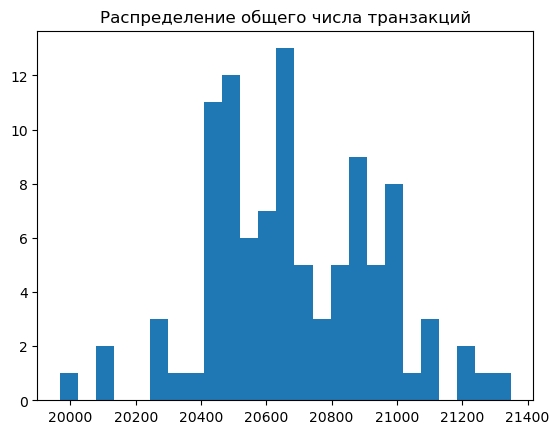

In [59]:
import matplotlib.pyplot as plt
plt.hist(all_runs, bins=25)
plt.title("Распределение общего числа транзакций")

np.float64(36589.37713944947)

In [125]:
from scipy.stats import truncnorm
import numpy as np

total_txns = 50000
avg_num_per_client = 30
txn_num_std = 10
low_bound = 1
up_bound = 120

est_clients = int(total_txns / avg_num_per_client)

# параметры отдельной транзакции на клиента
a = (low_bound - avg_num_per_client) / txn_num_std
b = (up_bound - avg_num_per_client) / txn_num_std
per_client_dist = truncnorm(a=a, b=b, loc=avg_num_per_client, scale=txn_num_std)

In [126]:
samples = per_client_dist.rvs(size=(10000, est_clients))
sum_txns = samples.sum(axis=1)

In [127]:
mean_sum = est_clients * per_client_dist.mean()
std_sum = np.sqrt(est_clients) * per_client_dist.std()

In [128]:
mean_sum, std_sum

(np.float64(50079.354567186376), np.float64(404.61437490963584))

In [152]:
fraud_rate = 0.04499054820415879
compr_share = 0.7

legit_count = round(mean_sum + 3*std_sum)
# подсчет количества транзакций равных 1% от всех транзакций
# т.к. не все транзакции еще созданы, то считаем основываясь на количестве 
# легальных транзакций и fraud rate
one_perc = round(legit_count / ((1 - fraud_rate) * 100))
# Абсолютное кол-во всего фрода
fraud_abs = one_perc * fraud_rate * 100
# Абсолютное кол-во фрод транзакций умножаем на долю транзакций compromised фрода
clients_count = round(fraud_abs * compr_share)
clients_count, est_clients, est_clients/fraud_abs // 0.01 * 0.01

(1691, 1666, 0.68)

In [151]:
# est_clients / (one_perc * fraud_rate * 100)
# fraud_rate = est_clients / (one_perc * 100)
# clients_count = (one_perc * fraud_rate * 100) * compr_share
fraud_rate = est_clients / (one_perc * 100 * compr_share)
fraud_rate

0.04499054820415879

In [154]:
os.getcwd()

'C:\\Users\\iaros\\My_documents\\Education\\projects\\fraud_detection_01\\notebooks'

In [155]:
os.chdir("..")

NameError: name 'pd' is not defined

In [158]:

from test01 import bimbus

In [166]:
args = ("a", "b", "c")
os.path.join(*args)

'a\\b\\c'

In [159]:
bimbus

'aboba galaboba'

In [172]:
from pathlib import Path
print(Path("aaa/avvv"))

aaa\avvv


In [160]:
os.path.join("aaa/", ""и)

'aaa/'

In [165]:
os.path.isdir("modules")

True

In [93]:
from scipy.stats import norm
approx_dist = norm(loc=mean_sum, scale=std_sum)

In [94]:
addition = 0
mul = 3
mean = approx_dist.mean()
std = approx_dist.std()
print(f"""mean: {round(mean)}
std: {round(std)}
addition: {addition}""")
# approx_dist.cdf(mean + std + addition) - approx_dist.cdf(mean - std - addition)
1 - approx_dist.cdf(mean + std*mul) - approx_dist.cdf(mean - std*mul)
294 * mul

mean: 10338
std: 208
addition: 0


882

(78, 500)

In [77]:
addition = 0
mean = dist01.mean()
std = dist01.std()
print(f"""mean: {round(mean)}
std: {round(std)}
addition: {addition}""")
dist01.cdf(mean + std + addition) - dist01.cdf(mean - std - addition)

mean: 20000
std: 10000
addition: 0


np.float64(0.6826894921370859)

In [78]:
0.6826894921370859 - 0.6826894921370856

2.220446049250313e-16

Text(0.5, 1.0, 'Распределение общего числа транзакций')

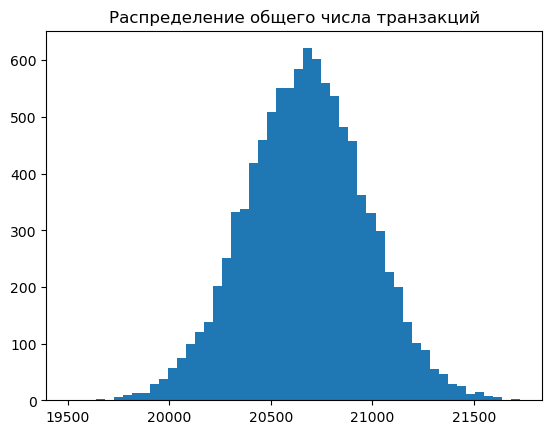

In [36]:
import matplotlib.pyplot as plt
plt.hist(sum_txns, bins=50)
plt.title("Распределение общего числа транзакций")

In [ ]:
addition = 8000
dist01.cdf(avg_total + total_std + addition) - dist01.cdf(avg_total - total_std - addition)

In [14]:
import itertools, sys, time
def spinner(static_text):
    """
    """
    spinner = itertools.cycle(['', '..', '....', '.....'])
    i = 0
    while i < 10:
        text = next(spinner)
        sys.stdout.write('\r' + static_text + text + ' ' * 10)  # перезаписываем строку + очищаем остатки
        sys.stdout.flush()
        time.sleep(1)
        i += 1
    
    sys.stdout.write('\nDone.\n')

# print("done with spinner")

In [15]:
spinner("Generating legit txns")

Generating legit txns..             
Done.


In [2]:
os.listdir(r"C:\Users\iaros\My_documents\Education\projects\fraud_detection_01\notebooks")

['.ipynb_checkpoints',
 '01_data_cleaning.ipynb',
 '02_cleaned_data_to_sql_db.ipynb',
 '03_geo_data_generation.ipynb',
 '03_whole_notebook_data_generation_v2.ipynb',
 '04_ip_addresses_generation.ipynb',
 '05COMMON_time_time_patterns_generation_30-06-2025.ipynb',
 '05DUPLICATE.ipynb',
 '05WHOLE_NB_time_patterns_generation_18-06-25.ipynb',
 '05_time_patterns_generation.ipynb',
 '06_devices_and_online_merchants.ipynb',
 '07v1_legit_transactions_generation.ipynb',
 '07v2_legit_transactions_generation.ipynb',
 '08_purchase_fraud_generation.ipynb',
 '09_drop_txns_generation.ipynb',
 'Untitled.ipynb']

In [ ]:
	# 1. 01_data_cleaning
	# 2. 02_geo_data_generation
	# 3. 03_ip_addresses_generation
	# 4. 06_devices_and_online_merchants
	# 5. 05_time_patterns_generation
	# 6. other_additional_data
	# 7. 07v2_legit_transactions_generation
	# 8. 08_purchase_fraud_generation
	# 9. 09_drop_txns_generation
	# 10. data_to_sql_db

In [1]:
import os
import yaml
from data_generator.runner.utils import make_dir_for_run

os.chdir("..")
with open("./config/base.yaml") as f:
    base_cfg = yaml.safe_load(f)

In [4]:
make_dir_for_run(base_cfg)

WindowsPath('data/generated/history/generation_run_2025-07-23_175759')

In [1]:
import pandas as pd
import os
os.chdir("..")

In [ ]:
accounts = pd.read_csv("./data/generated/latest/accounts.csv")

In [6]:
drops = accounts.query("is_drop == True")
drops

,client_id,account_id,is_drop
42,45,10042,True
5198,11709,15198,True


In [5]:
all_txns = pd.read_parquet("./data/generated/latest/all_txns.parquet")

In [7]:
all_txns.rule.unique()

array(['not applicable', 'new_ip_and_device_high_amount',
       'drop_flow_cashout', 'fast_geo_change_online', 'fast_geo_change',
       'new_device_and_high_amount', 'trans_freq_increase',
       'drop_purchaser'], dtype=object)

In [10]:
txns_drop_ids = all_txns.query("rule in ['drop_flow_cashout', 'drop_purchaser']").client_id.unique()
txns_drop_ids

array([   45, 11709])

In [13]:
assert drops.loc[~drops.client_id.isin(txns_drop_ids)].empty

In [14]:
accs_fm_hist = pd.read_csv(r"C:\Users\iaros\My_documents\Education\projects\fraud_detection_01\data\generated\history\generation_run_2025-07-24_085339\accounts.csv")

In [16]:
drops_fm_hist = accs_fm_hist.query("is_drop == True")
drops_fm_hist

,client_id,account_id,is_drop
42,45,10042,True
5198,11709,15198,True


In [18]:
accs_merged = drops_fm_hist.merge(drops, how="outer", on="client_id")
accs_merged

,client_id,account_id_x,is_drop_x,account_id_y,is_drop_y
0,45,10042,True,10042,True
1,11709,15198,True,15198,True


In [21]:
accs_merged.isna().any().any()

np.False_